<a href="https://colab.research.google.com/github/Crazytiger0527/Study_Pytorch/blob/main/unet_carvandata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# kaggle의 carvandata set을 unet을 이용하여 segmetation을 진행하였다.
import numpy as np 
import pandas as pd
import os
import cv2
from PIL import Image
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [ ]:
## 데이터 전처리리
# train데이터 경로, val데이터 경로로
class ROOTDIR:
    train = "/content/drive/MyDrive/CarvanaDatasets/train_images"
    train_mask = "/content/drive/MyDrive/CarvanaDatasets/train_masks"
    val = '/content/drive/MyDrive/CarvanaDatasets/val_images'
    val_mask = '/content/drive/MyDrive/CarvanaDatasets/val_masks'
    test = '/content/drive/MyDrive/CarvanaDatasets/test_images'
    test_mask = '/content/drive/MyDrive/CarvanaDatasets/test_masks'

In [ ]:
# train데이터 리스트에 저장
train_img_lst = os.listdir(ROOTDIR.train) 
train_mask_lst = os.listdir(ROOTDIR.train_mask) 

# val 데이터 리스트에 저장
val_img_lst = os.listdir(ROOTDIR.val) 
val_mask_lst = os.listdir(ROOTDIR.val_mask) 

# 확인작업
print(train_mask_lst[:5])
print(train_img_lst[:5])
print(val_mask_lst[:5])
print(val_img_lst[:5])

print(len(train_mask_lst))
print(len(train_img_lst))
print(len(val_mask_lst))
print(len(val_img_lst))

['d0392fd5feb6_07_mask.gif', 'd0392fd5feb6_08_mask.gif', 'd0392fd5feb6_02_mask.gif', 'd0392fd5feb6_06_mask.gif', 'd0392fd5feb6_05_mask.gif']
['d0392fd5feb6_05.jpg', 'd0392fd5feb6_02.jpg', 'd0392fd5feb6_03.jpg', 'd0392fd5feb6_08.jpg', 'd0392fd5feb6_06.jpg']
['0cdf5b5d0ce1_04_mask.gif', '0cdf5b5d0ce1_05_mask.gif', '0cdf5b5d0ce1_03_mask.gif', '0cdf5b5d0ce1_02_mask.gif', '0cdf5b5d0ce1_06_mask.gif']
['0cdf5b5d0ce1_01.jpg', '0cdf5b5d0ce1_09.jpg', '0cdf5b5d0ce1_05.jpg', '0cdf5b5d0ce1_03.jpg', '0cdf5b5d0ce1_07.jpg']
944
944
240
240


In [ ]:
# 리스트 정렬시켜주기
sorted_train_mask_lst = sorted(train_mask_lst)
sorted_train_img_lst = sorted(train_img_lst)
sorted_val_mask_lst = sorted(val_mask_lst)
sorted_val_img_lst = sorted(val_img_lst)

# 확인작업
print(sorted_train_mask_lst[:16])
print(sorted_train_img_lst[:16])
print(sorted_val_mask_lst[:16])
print(sorted_val_img_lst[:16])

['d0392fd5feb6_01_mask.gif', 'd0392fd5feb6_02_mask.gif', 'd0392fd5feb6_03_mask.gif', 'd0392fd5feb6_04_mask.gif', 'd0392fd5feb6_05_mask.gif', 'd0392fd5feb6_06_mask.gif', 'd0392fd5feb6_07_mask.gif', 'd0392fd5feb6_08_mask.gif', 'd0392fd5feb6_09_mask.gif', 'd0392fd5feb6_10_mask.gif', 'd0392fd5feb6_11_mask.gif', 'd0392fd5feb6_12_mask.gif', 'd0392fd5feb6_13_mask.gif', 'd0392fd5feb6_14_mask.gif', 'd0392fd5feb6_15_mask.gif', 'd0392fd5feb6_16_mask.gif']
['d0392fd5feb6_01.jpg', 'd0392fd5feb6_02.jpg', 'd0392fd5feb6_03.jpg', 'd0392fd5feb6_04.jpg', 'd0392fd5feb6_05.jpg', 'd0392fd5feb6_06.jpg', 'd0392fd5feb6_07.jpg', 'd0392fd5feb6_08.jpg', 'd0392fd5feb6_09.jpg', 'd0392fd5feb6_10.jpg', 'd0392fd5feb6_11.jpg', 'd0392fd5feb6_12.jpg', 'd0392fd5feb6_13.jpg', 'd0392fd5feb6_14.jpg', 'd0392fd5feb6_15.jpg', 'd0392fd5feb6_16.jpg']
['0cdf5b5d0ce1_01_mask.gif', '0cdf5b5d0ce1_02_mask.gif', '0cdf5b5d0ce1_03_mask.gif', '0cdf5b5d0ce1_04_mask.gif', '0cdf5b5d0ce1_05_mask.gif', '0cdf5b5d0ce1_06_mask.gif', '0cdf5b5d0ce1

In [ ]:
# 이미지와 마스크를 출력해주는 함수
def show_images(imgs_lst,masks_lst,t_v,loops=2):
    for i in range(loops):
        if t_v == 1:
          img_path = os.path.join(ROOTDIR.train,imgs_lst[i])
          mask_path = os.path.join(ROOTDIR.train_mask,masks_lst[i])
        else:
          img_path = os.path.join(ROOTDIR.val,imgs_lst[i])
          mask_path = os.path.join(ROOTDIR.val_mask,masks_lst[i])
        img = Image.open(img_path)
        mask = Image.open(mask_path)
        print(img_path)
        print(img.size)
        print(type(img))
        plt.imshow(img)
        plt.show()
        print(mask_path)
        print(mask.size)
        plt.imshow(mask)
        plt.show()
        print("----------------------------------------------------")

/content/drive/MyDrive/CarvanaDatasets/train_images/d0392fd5feb6_01.jpg
(1918, 1280)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


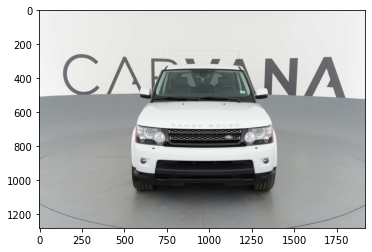

/content/drive/MyDrive/CarvanaDatasets/train_masks/d0392fd5feb6_01_mask.gif
(1918, 1280)


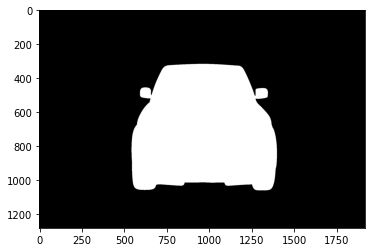

----------------------------------------------------
/content/drive/MyDrive/CarvanaDatasets/train_images/d0392fd5feb6_02.jpg
(1918, 1280)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


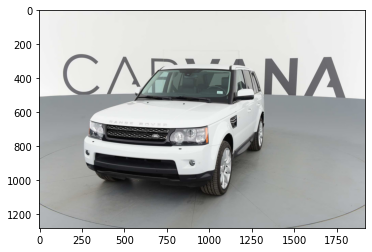

/content/drive/MyDrive/CarvanaDatasets/train_masks/d0392fd5feb6_02_mask.gif
(1918, 1280)


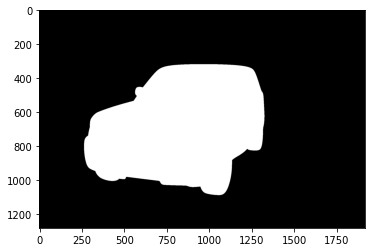

----------------------------------------------------


In [ ]:
# 함수확인1
show_images(sorted_train_img_lst, sorted_train_mask_lst, 1)

/content/drive/MyDrive/CarvanaDatasets/val_images/0cdf5b5d0ce1_01.jpg
(1918, 1280)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


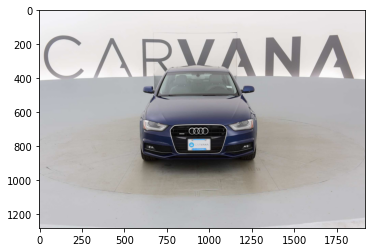

/content/drive/MyDrive/CarvanaDatasets/val_masks/0cdf5b5d0ce1_01_mask.gif
(1918, 1280)


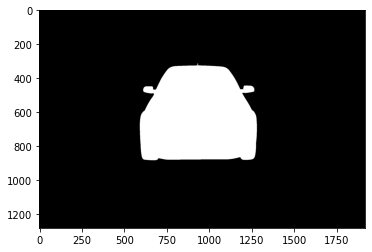

----------------------------------------------------
/content/drive/MyDrive/CarvanaDatasets/val_images/0cdf5b5d0ce1_02.jpg
(1918, 1280)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


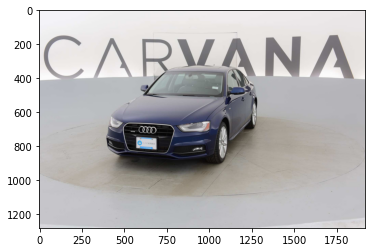

/content/drive/MyDrive/CarvanaDatasets/val_masks/0cdf5b5d0ce1_02_mask.gif
(1918, 1280)


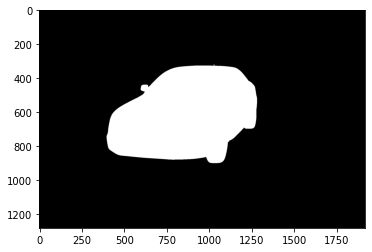

----------------------------------------------------


In [ ]:
# 함수확인2
show_images(sorted_val_img_lst, sorted_val_mask_lst, 2)

In [ ]:
import torch
import torchvision
import torch.nn as nn
import albumentations as A
import torch.optim as optim
from torchvision import models
import torch.nn.functional as F
from torch.optim import lr_scheduler
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from albumentations.pytorch import ToTensorV2 
from torch.utils.data import DataLoader, Dataset

In [ ]:
# 파라미터 설정
class CFG:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # train과 val set 비율
    split_pct = 0.2
    learning_rate = 1e-4
    batch_size = 4
    epochs = 5

In [ ]:
# cpu연산을 고정시키기 위한 코드
# 음... 잘 모르겠다.
seed = 123
np.random.seed(seed)
torch.manual_seed(seed)

In [ ]:
# cuda확인
CFG.device

device(type='cuda')

In [ ]:
# permute(순열? 치환?)해줌
# 순서가 부여된 임의의 집합을 다른 순서로 뒤섞는 연산
# 정렬된 train 리스트를 무작위로 섞음
permuted_train_img_lst = np.random.permutation(np.array(sorted_train_img_lst))
permuted_train_mask_lst = [x.replace(".jpg","_mask.gif") for x in permuted_train_img_lst]
# permuted_train_mask_lst = [x.replace("_mask.gif",".jpg") for x in permuted_train_img_lst]
# 왜 .replace를 한건지 모르겠다...진짜 모르겠다.
permuted_val_img_lst = np.random.permutation(np.array(sorted_val_img_lst))
permuted_val_mask_lst = [x.replace(".jpg","_mask.gif") for x in permuted_val_img_lst]

# 확인
# 무작위로 섞이는 것을 볼수있다
print(permuted_train_img_lst[:5])
print(permuted_train_mask_lst[:5])
print(permuted_val_img_lst[:5])
print(permuted_val_mask_lst[:5])

['eefc0d8c94f0_10.jpg' 'e1d2c25f3510_11.jpg' 'feaf59172a01_11.jpg'
 'fdc2c87853ce_11.jpg' 'de74550a306a_03.jpg']
['eefc0d8c94f0_10_mask.gif', 'e1d2c25f3510_11_mask.gif', 'feaf59172a01_11_mask.gif', 'fdc2c87853ce_11_mask.gif', 'de74550a306a_03_mask.gif']
['0d53224da2b7_08.jpg' '1e6f48393e17_12.jpg' '0d1a9caf4350_15.jpg'
 '1c5748340af8_16.jpg' '1e89e1af42e7_02.jpg']
['0d53224da2b7_08_mask.gif', '1e6f48393e17_12_mask.gif', '0d1a9caf4350_15_mask.gif', '1c5748340af8_16_mask.gif', '1e89e1af42e7_02_mask.gif']


/content/drive/MyDrive/CarvanaDatasets/train_images/eefc0d8c94f0_10.jpg
(1918, 1280)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


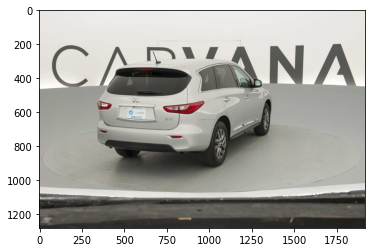

/content/drive/MyDrive/CarvanaDatasets/train_masks/eefc0d8c94f0_10_mask.gif
(1918, 1280)


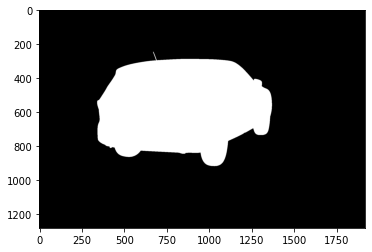

----------------------------------------------------
/content/drive/MyDrive/CarvanaDatasets/train_images/e1d2c25f3510_11.jpg
(1918, 1280)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


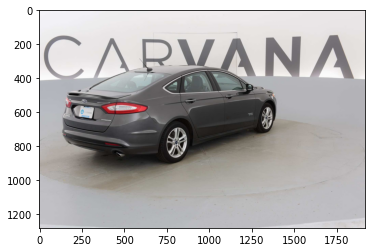

/content/drive/MyDrive/CarvanaDatasets/train_masks/e1d2c25f3510_11_mask.gif
(1918, 1280)


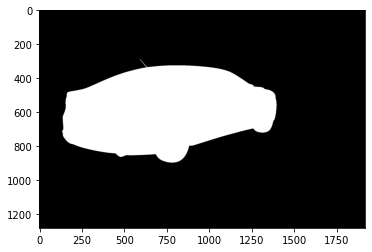

----------------------------------------------------


In [ ]:
# 출력해보기
# 무작위 2개 나오는것을 볼 수 있다.
show_images(permuted_train_img_lst,permuted_train_mask_lst,1)

/content/drive/MyDrive/CarvanaDatasets/val_images/0d53224da2b7_08.jpg
(1918, 1280)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


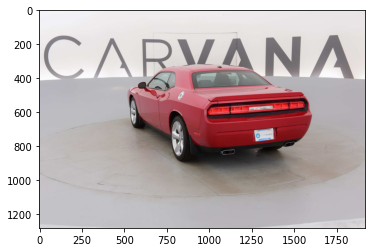

/content/drive/MyDrive/CarvanaDatasets/val_masks/0d53224da2b7_08_mask.gif
(1918, 1280)


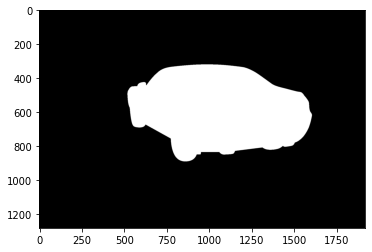

----------------------------------------------------
/content/drive/MyDrive/CarvanaDatasets/val_images/1e6f48393e17_12.jpg
(1918, 1280)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


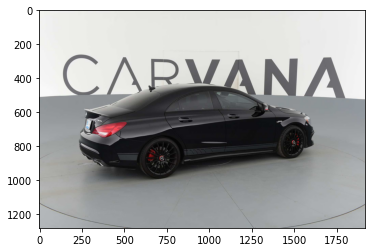

/content/drive/MyDrive/CarvanaDatasets/val_masks/1e6f48393e17_12_mask.gif
(1918, 1280)


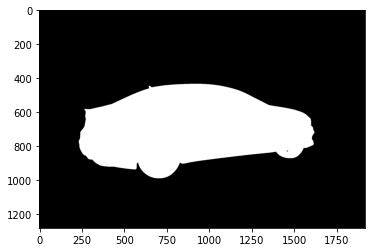

----------------------------------------------------


In [ ]:
# 출력해보기
# 무작위 2개 나오는것을 볼 수 있다.
show_images(permuted_val_img_lst,permuted_val_mask_lst,2)

In [ ]:
'''
# train데이터에서 train과 val set으로 나누는 과정
# 나는 val 데이터를 따로 분류해놓아 사용하지 않았다.

# 0.2를 val 데이터로 사용한다.
train_images_list = permuted_train_img_lst[int(CFG.split_pct*len(permuted_train_img_lst)) :]
train_masks_list = permuted_train_mask_lst[int(CFG.split_pct*len(permuted_train_mask_lst)) :]
print(len(train_masks_list))

val_images_list = permuted_train_img_lst[: int(CFG.split_pct*len(permuted_train_img_lst))]
val_masks_list = permuted_train_mask_lst[: int(CFG.split_pct*len(permuted_train_mask_lst))]
print(len(val_masks_list))
'''

'\n# train데이터에서 train과 val set으로 나누는 과정\n# 나는 val 데이터를 따로 분류해놓아 사용하지 않았다.\n\n# 0.2를 val 데이터로 사용한다.\ntrain_images_list = permuted_train_img_lst[int(CFG.split_pct*len(permuted_train_img_lst)) :]\ntrain_masks_list = permuted_train_mask_lst[int(CFG.split_pct*len(permuted_train_mask_lst)) :]\nprint(len(train_masks_list))\n\nval_images_list = permuted_train_img_lst[: int(CFG.split_pct*len(permuted_train_img_lst))]\nval_masks_list = permuted_train_mask_lst[: int(CFG.split_pct*len(permuted_train_mask_lst))]\nprint(len(val_masks_list))\n'

In [ ]:
train_images_list = permuted_train_img_lst
train_masks_list = permuted_train_mask_lst
val_images_list = permuted_val_img_lst
val_masks_list = permuted_val_mask_lst

/content/drive/MyDrive/CarvanaDatasets/train_images/eefc0d8c94f0_10.jpg
(1918, 1280)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


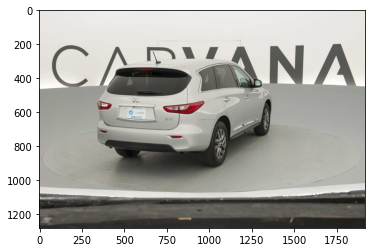

/content/drive/MyDrive/CarvanaDatasets/train_masks/eefc0d8c94f0_10_mask.gif
(1918, 1280)


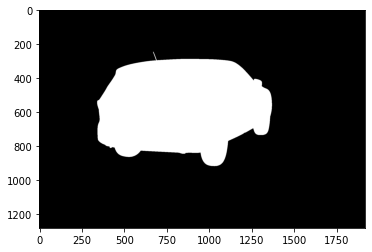

----------------------------------------------------
/content/drive/MyDrive/CarvanaDatasets/train_images/e1d2c25f3510_11.jpg
(1918, 1280)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


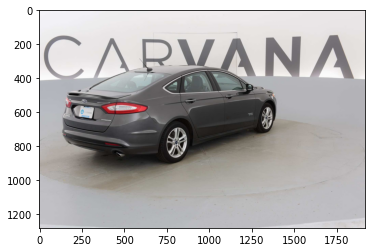

/content/drive/MyDrive/CarvanaDatasets/train_masks/e1d2c25f3510_11_mask.gif
(1918, 1280)


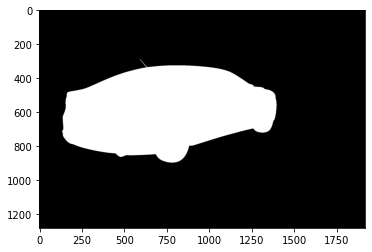

----------------------------------------------------
/content/drive/MyDrive/CarvanaDatasets/val_images/0d53224da2b7_08.jpg
(1918, 1280)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


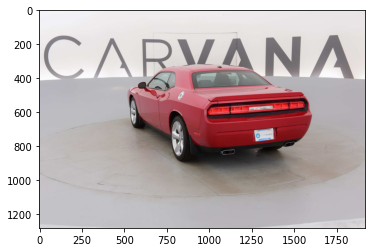

/content/drive/MyDrive/CarvanaDatasets/val_masks/0d53224da2b7_08_mask.gif
(1918, 1280)


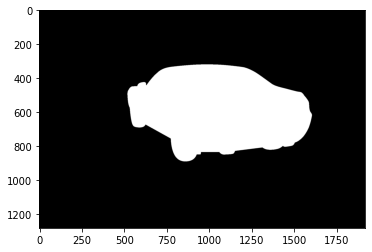

----------------------------------------------------
/content/drive/MyDrive/CarvanaDatasets/val_images/1e6f48393e17_12.jpg
(1918, 1280)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


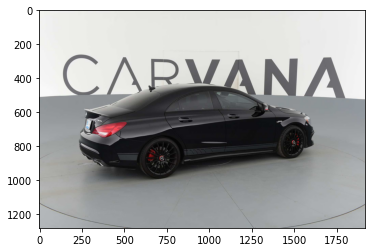

/content/drive/MyDrive/CarvanaDatasets/val_masks/1e6f48393e17_12_mask.gif
(1918, 1280)


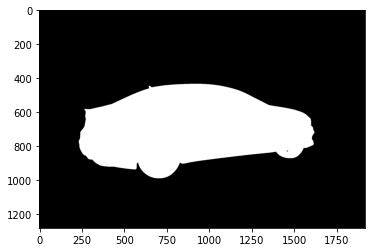

----------------------------------------------------


In [ ]:
# 출력 해보기
show_images(train_images_list,train_masks_list,1)
show_images(val_images_list,val_masks_list,2)

In [ ]:
# Dataset 클래스
class CarvanaDataset(Dataset):
    def __init__(self,img_list,mask_list,t_v,transform=None):
        self.img_list = img_list
        self.mask_list = mask_list
        self.t_v = t_v
        self.transform = transform
        
    def __len__(self):
        return len(self.img_list)
    
    def __getitem__(self,index):
        if self.t_v == 1:
          img_path = os.path.join(ROOTDIR.train,self.img_list[index])
          mask_path = os.path.join(ROOTDIR.train_mask,self.mask_list[index])
        elif self.t_v == 2:
          img_path = os.path.join(ROOTDIR.val,self.img_list[index])
          mask_path = os.path.join(ROOTDIR.val_mask,self.mask_list[index])
        else:
          img_path = os.path.join(ROOTDIR.test,self.img_list[index])
          mask_path = os.path.join(ROOTDIR.test_mask,self.mask_list[index])
        img = Image.open(img_path)
        mask = Image.open(mask_path)
        # 넘파이 배열로 저장
        img = np.array(img)
        mask = np.array(mask)
        # ?????
        mask[mask==255.0] = 1.0
        # ????
        img_mask_dict = {"image": img, "mask": mask}
        
        # augmentation : 첨가
        if self.transform:
            augmentation = self.transform(image=img, mask=mask)
            img = augmentation["image"]
            mask = augmentation["mask"]
            # 마스크의 체널 증가시켜주기
            mask = torch.unsqueeze(mask,0)
            
        return img,mask

In [ ]:
# transform
train_transform = A.Compose([A.Resize(512,512), 
                             A.Rotate(limit=15,p=0.1),
                             A.HorizontalFlip(p=0.5),
                             A.Normalize(mean=(0,0,0),std=(1,1,1),max_pixel_value=255),
                             ToTensorV2()])

val_transform = A.Compose([A.Resize(512,512),
                           A.Normalize(mean=(0,0,0),std=(1,1,1),max_pixel_value=255),
                           ToTensorV2()])

In [ ]:
train_dataset = CarvanaDataset(train_images_list, train_masks_list, 1, transform = train_transform)
val_dataset = CarvanaDataset(val_images_list, val_masks_list, 2, transform = train_transform)

In [ ]:
# 확인해보기
# 텐서로 잘 되었고, mask의 체널도 추가되었음을 볼수있다.
idx = 200
img,mask = train_dataset[idx]
print(img.shape)
print(mask.shape)

torch.Size([3, 512, 512])
torch.Size([1, 512, 512])


In [ ]:
# 이미지 출력하는 함수
def show_single_img(img,mask,index=None,train=True):
    if index:
        if train:
            img,mask = train_dataset[index]
        else:
            img,mask = val_dataset[index]
    
    plt.imshow(img.permute(1,2,0),cmap="gray")  # Convert (3, 572, 572) -> (572, 572, 3)
    print(img.shape)
    plt.show()
    
    # 체널수 1이 포함되면 출력이 되지 않는다. 따라서[:, :, -1]를 추가함으로써 체널수 1을 삭제하여 출력이 되도록 수정하였다.
    plt.imshow(mask.permute(1,2,0)[:, :, -1], cmap="gray")  # Convert (1, 572, 572) -> (572, 572)
    print(mask.shape)
    plt.show()

---------------Train---------------
torch.Size([3, 512, 512])


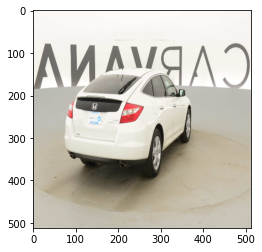

torch.Size([1, 512, 512])


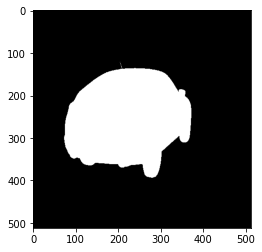

---------------Validation---------------
torch.Size([3, 512, 512])


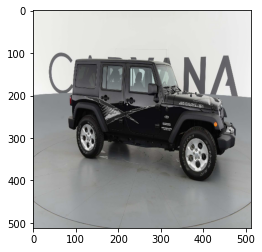

torch.Size([1, 512, 512])


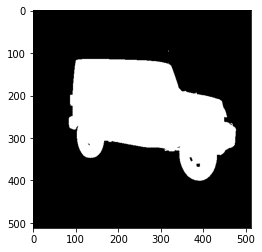

In [ ]:
# 확인해보기
print("---------------Train---------------")
show_single_img(img,mask,index=15,train=False)
print("---------------Validation---------------")
show_single_img(img,mask,index=15,train=True)

In [ ]:
# dataloader
train_dataloader = DataLoader(train_dataset,batch_size=CFG.batch_size,shuffle=True)
val_dataloader = DataLoader(val_dataset,batch_size=CFG.batch_size,shuffle=False)

In [ ]:
img,mask = next(iter(train_dataloader))
print(img.shape,mask.shape)

torch.Size([4, 3, 512, 512]) torch.Size([4, 1, 512, 512])


In [ ]:
## 모델 제작

# Sizes of tensors must match except in dimension 1. Expected size 70 but got size 71 for tensor number 1 in the list.
# 해결방법 : 이미지 size를 572*572 -> 512*512로 수정하였다.
# 아마도 /2 or *2 를 하는 도중 문제가 생긴듯 하다. 따라서 이미지의 크기를 2의 제곱수로 변경하였더니 해결이 되었다.
class UNet(nn.Module):
    
    def __init__(self, in_chnls, n_classes):
        super(UNet, self).__init__()
        self.in_chnls = in_chnls
        self.n_classes = n_classes
        self.contracting_11 = self.conv_block(in_channels=self.in_chnls, out_channels=64)
        self.contracting_12 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.contracting_21 = self.conv_block(in_channels=64, out_channels=128)
        self.contracting_22 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.contracting_31 = self.conv_block(in_channels=128, out_channels=256)
        self.contracting_32 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.contracting_41 = self.conv_block(in_channels=256, out_channels=512)
        self.contracting_42 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.middle = self.conv_block(in_channels=512, out_channels=1024)
        self.expansive_11 = nn.ConvTranspose2d(in_channels=1024, out_channels=512, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.expansive_12 = self.conv_block(in_channels=1024, out_channels=512)
        self.expansive_21 = nn.ConvTranspose2d(in_channels=512, out_channels=256, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.expansive_22 = self.conv_block(in_channels=512, out_channels=256)
        self.expansive_31 = nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.expansive_32 = self.conv_block(in_channels=256, out_channels=128)
        self.expansive_41 = nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.expansive_42 = self.conv_block(in_channels=128, out_channels=64)
        self.output = nn.Conv2d(in_channels=64, out_channels=n_classes, kernel_size=3, stride=1, padding=1)
        
    def conv_block(self, in_channels, out_channels):
        block = nn.Sequential(nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=out_channels),
                                    nn.Conv2d(in_channels=out_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=out_channels))
        return block
    
    def forward(self, X):
        contracting_11_out = self.contracting_11(X) # [-1, 64, 256, 256]
        contracting_12_out = self.contracting_12(contracting_11_out) # [-1, 64, 128, 128]
        contracting_21_out = self.contracting_21(contracting_12_out) # [-1, 128, 128, 128]
        contracting_22_out = self.contracting_22(contracting_21_out) # [-1, 128, 64, 64]
        contracting_31_out = self.contracting_31(contracting_22_out) # [-1, 256, 64, 64]
        contracting_32_out = self.contracting_32(contracting_31_out) # [-1, 256, 32, 32]
        contracting_41_out = self.contracting_41(contracting_32_out) # [-1, 512, 32, 32]
        contracting_42_out = self.contracting_42(contracting_41_out) # [-1, 512, 16, 16]
        middle_out = self.middle(contracting_42_out) # [-1, 1024, 16, 16]
        expansive_11_out = self.expansive_11(middle_out) # [-1, 512, 32, 32]
        expansive_12_out = self.expansive_12(torch.cat((expansive_11_out, contracting_41_out), dim=1)) # [-1, 1024, 32, 32] -> [-1, 512, 32, 32]
        expansive_21_out = self.expansive_21(expansive_12_out) # [-1, 256, 64, 64]
        expansive_22_out = self.expansive_22(torch.cat((expansive_21_out, contracting_31_out), dim=1)) # [-1, 512, 64, 64] -> [-1, 256, 64, 64]
        expansive_31_out = self.expansive_31(expansive_22_out) # [-1, 128, 128, 128]
        expansive_32_out = self.expansive_32(torch.cat((expansive_31_out, contracting_21_out), dim=1)) # [-1, 256, 128, 128] -> [-1, 128, 128, 128]
        expansive_41_out = self.expansive_41(expansive_32_out) # [-1, 64, 256, 256]
        expansive_42_out = self.expansive_42(torch.cat((expansive_41_out, contracting_11_out), dim=1)) # [-1, 128, 256, 256] -> [-1, 64, 256, 256]
        output_out = self.output(expansive_42_out) # [-1, num_classes, 256, 256]
        return output_out

In [ ]:
'''
def double_conv(in_ch, out_ch):
    conv = nn.Sequential(
        nn.Conv2d(in_channels=in_ch,out_channels=out_ch,kernel_size=3,stride=1,padding=1),
        nn.BatchNorm2d(out_ch),                                                            
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=out_ch,out_channels=out_ch,kernel_size=3,stride=1,padding=1), 
        nn.BatchNorm2d(out_ch),                                                            
        nn.ReLU(inplace=True)
    )
    
    return conv

#def cropper(og_tensor, target_tensor):
#    og_shape = og_tensor.shape[2]
#    target_shape = target_tensor.shape[2]
#    delta = (og_shape - target_shape) // 2
#    cropped_og_tensor = og_tensor[:,:,delta:og_shape-delta,delta:og_shape-delta]
#    return cropped_og_tensor
 
    
def padder(left_tensor, right_tensor): 
    # left_tensor is the tensor on the encoder side of UNET
    # right_tensor is the tensor on the decoder side  of the UNET
    
    if left_tensor.shape != right_tensor.shape:
        padded = torch.zeros(left_tensor.shape)
        padded[:, :, :right_tensor.shape[2], :right_tensor.shape[3]] = right_tensor
        return padded.to(CFG.device)
    
    return right_tensor.to(CFG.device)

class UNET(nn.Module):
    def __init__(self,in_chnls, n_classes):
        super(UNET,self).__init__()
        
        self.in_chnls = in_chnls
        self.n_classes = n_classes
        
        self.max_pool = nn.MaxPool2d(kernel_size=2,stride=2)
        
        self.down_conv_1 = double_conv(in_ch=self.in_chnls,out_ch=64)
        self.down_conv_2 = double_conv(in_ch=64,out_ch=128)
        self.down_conv_3 = double_conv(in_ch=128,out_ch=256)
        self.down_conv_4 = double_conv(in_ch=256,out_ch=512)
        self.down_conv_5 = double_conv(in_ch=512,out_ch=1024)
        #print(self.down_conv_1)
        
        self.up_conv_trans_1 = nn.ConvTranspose2d(in_channels=1024,out_channels=512,kernel_size=2,stride=2)
        self.up_conv_trans_2 = nn.ConvTranspose2d(in_channels=512,out_channels=256,kernel_size=2,stride=2)
        self.up_conv_trans_3 = nn.ConvTranspose2d(in_channels=256,out_channels=128,kernel_size=2,stride=2)
        self.up_conv_trans_4 = nn.ConvTranspose2d(in_channels=128,out_channels=64,kernel_size=2,stride=2)
        
        self.up_conv_1 = double_conv(in_ch=1024,out_ch=512)
        self.up_conv_2 = double_conv(in_ch=512,out_ch=256)
        self.up_conv_3 = double_conv(in_ch=256,out_ch=128)
        self.up_conv_4 = double_conv(in_ch=128,out_ch=64)
        
        self.conv_1x1 = nn.Conv2d(in_channels=64,out_channels=self.n_classes,kernel_size=1,stride=1)
        
    def forward(self,x):
        
        # encoding
        x1 = self.down_conv_1(x)
        #print("X1", x1.shape)
        p1 = self.max_pool(x1)
        #print("p1", p1.shape)
        x2 = self.down_conv_2(p1)
        #print("X2", x2.shape)
        p2 = self.max_pool(x2)
        #print("p2", p2.shape)
        x3 = self.down_conv_3(p2)
        #print("X2", x3.shape)
        p3 = self.max_pool(x3)
        #print("p3", p3.shape)
        x4 = self.down_conv_4(p3)
        #print("X4", x4.shape)
        p4 = self.max_pool(x4)
        #print("p4", p4.shape)
        x5 = self.down_conv_5(p4)
        #print("X5", x5.shape)
        
        # decoding
        d1 = self.up_conv_trans_1(x5)  # up transpose convolution ("up sampling" as called in UNET paper)
        pad1 = padder(x4,d1) # padding d1 to match x4 shape
        cat1 = torch.cat([x4,pad1],dim=1) # concatenating padded d1 and x4 on channel dimension(dim 1) [batch(dim 0),channel(dim 1),height(dim 2),width(dim 3)]
        uc1 = self.up_conv_1(cat1) # 1st up double convolution
        
        d2 = self.up_conv_trans_2(uc1)
        pad2 = padder(x3,d2)
        cat2 = torch.cat([x3,pad2],dim=1)
        uc2 = self.up_conv_2(cat2)
        
        d3 = self.up_conv_trans_3(uc2)
        pad3 = padder(x2,d3)
        cat3 = torch.cat([x2,pad3],dim=1)
        uc3 = self.up_conv_3(cat3)
        
        d4 = self.up_conv_trans_4(uc3)
        pad4 = padder(x1,d4)
        cat4 = torch.cat([x1,pad4],dim=1)
        uc4 = self.up_conv_4(cat4)
        
        conv_1x1 = self.conv_1x1(uc4)
        return conv_1x1
        #print(conv_1x1.shape)

        '''

'\ndef double_conv(in_ch, out_ch):\n    conv = nn.Sequential(\n        nn.Conv2d(in_channels=in_ch,out_channels=out_ch,kernel_size=3,stride=1,padding=1),\n        nn.BatchNorm2d(out_ch),                                                            \n        nn.ReLU(inplace=True),\n        nn.Conv2d(in_channels=out_ch,out_channels=out_ch,kernel_size=3,stride=1,padding=1), \n        nn.BatchNorm2d(out_ch),                                                            \n        nn.ReLU(inplace=True)\n    )\n    \n    return conv\n\n#def cropper(og_tensor, target_tensor):\n#    og_shape = og_tensor.shape[2]\n#    target_shape = target_tensor.shape[2]\n#    delta = (og_shape - target_shape) // 2\n#    cropped_og_tensor = og_tensor[:,:,delta:og_shape-delta,delta:og_shape-delta]\n#    return cropped_og_tensor\n \n    \ndef padder(left_tensor, right_tensor): \n    # left_tensor is the tensor on the encoder side of UNET\n    # right_tensor is the tensor on the decoder side  of the UNET\n    \n    if

In [ ]:
# train model
def train_model(model,dataloader,criterion,optimizer):
    model.train()
    train_running_loss = 0.0
    for j,img_mask in enumerate(tqdm(dataloader)):
        img = img_mask[0].float().to(CFG.device)
        #print(" ----- IMAGE -----")
        #print(img)
        mask = img_mask[1].float().to(CFG.device)
        #print(" ----- MASK -----")
        #print(mask)
        
        y_pred = model(img)
        #print(" ----- Y PRED -----")
        #print(y_pred)
        #print(" ----- Y PRED SHAPE -----")#
        #print(y_pred.shape)
        optimizer.zero_grad()
        
        loss = criterion(y_pred,mask)
        
        train_running_loss += loss.item() * CFG.batch_size
        
        loss.backward()
        optimizer.step()
        
    train_loss = train_running_loss / (j+1)
    return train_loss

In [ ]:
def val_model(model,dataloader,criterion,optimizer):
    model.eval()
    val_running_loss = 0
    with torch.no_grad():
        for j,img_mask in enumerate(tqdm(dataloader)):
            img = img_mask[0].float().to(CFG.device)
            mask = img_mask[1].float().to(CFG.device)
            y_pred = model(img)
            loss = criterion(y_pred,mask)
            
            val_running_loss += loss.item() * CFG.batch_size
            
        val_loss = val_running_loss / (j+1)
    return val_loss

In [ ]:
#model = UNET(in_chnls = 3, n_classes = 1).to(CFG.device)
model = UNet(in_chnls = 3, n_classes = 1).to(CFG.device)
optimizer = optim.Adam(model.parameters(), lr = CFG.learning_rate)
criterion = nn.BCEWithLogitsLoss()
train_loss_lst = []
val_loss_lst = []  

In [ ]:
for i in tqdm(range(CFG.epochs)):
    train_loss = train_model(model=model,dataloader=train_dataloader,criterion=criterion,optimizer=optimizer)
    val_loss = val_model(model=model,dataloader=val_dataloader,criterion=criterion,optimizer=optimizer)
    train_loss_lst.append(train_loss)
    val_loss_lst.append(val_loss)
    print(f" Train Loss : {train_loss:.4f}")
    print(f" Validation Loss : {val_loss:.4f}")

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/236 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

 Train Loss : 0.4361
 Validation Loss : 0.1016


  0%|          | 0/236 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

 Train Loss : 0.1460
 Validation Loss : 0.0750


  0%|          | 0/236 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

 Train Loss : 0.0722
 Validation Loss : 0.0608


  0%|          | 0/236 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

 Train Loss : 0.0607
 Validation Loss : 0.0495


  0%|          | 0/236 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

 Train Loss : 0.0479
 Validation Loss : 0.0379


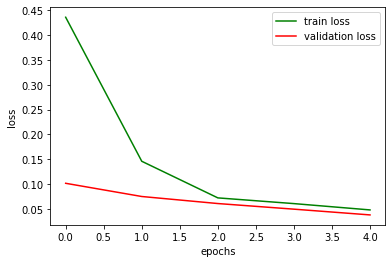

In [ ]:
plt.plot(train_loss_lst, color="green", label='train loss')
plt.plot(val_loss_lst, color="red", label='validation loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [ ]:
TRAINED_FILE = "./unet_scratch.pth"

In [ ]:
torch.save(model.state_dict(), TRAINED_FILE)

In [ ]:
from IPython.display import FileLink
FileLink(TRAINED_FILE)

/content/unet_scratch.pth

In [ ]:
trained_model = UNet(in_chnls = 3, n_classes = 1)

In [ ]:
UNET_TRAINED = "/content/unet_scratch.pth"

In [ ]:
trained_model.load_state_dict(torch.load(UNET_TRAINED))

<All keys matched successfully>

In [ ]:
trained_model = trained_model.to("cuda")
trained_model.eval()

UNet(
  (contracting_11): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (contracting_12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (contracting_21): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (contracting_22): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (contr

In [ ]:
img_path = "/content/drive/MyDrive/CarvanaDatasets/test_images/cf89c3220bc4_05.jpg"

img = cv2.imread(img_path)
img.shape

(1280, 1918, 3)

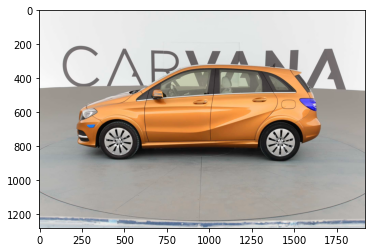

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
test_transform = A.Compose([A.Resize(512,512),
                           A.Normalize(mean=(0,0,0),std=(1,1,1),max_pixel_value=255),
                           ToTensorV2()])

In [ ]:
test_image = test_transform(image = img)
print(test_image)

print(test_image["image"].dtype)
print(test_image["image"].shape)

img = test_image["image"].unsqueeze(0)
print(img.shape)

img = img.to("cuda")

{'image': tensor([[[0.9569, 0.9569, 0.9569,  ..., 0.9490, 0.9490, 0.9490],
         [0.9569, 0.9569, 0.9569,  ..., 0.9490, 0.9490, 0.9490],
         [0.9569, 0.9569, 0.9569,  ..., 0.9490, 0.9490, 0.9490],
         ...,
         [0.7725, 0.7725, 0.7843,  ..., 0.7843, 0.7804, 0.7843],
         [0.7804, 0.7804, 0.7843,  ..., 0.7647, 0.7686, 0.7725],
         [0.7843, 0.7843, 0.7843,  ..., 0.7686, 0.7647, 0.7647]],

        [[0.9569, 0.9569, 0.9569,  ..., 0.9490, 0.9490, 0.9490],
         [0.9569, 0.9569, 0.9569,  ..., 0.9490, 0.9490, 0.9490],
         [0.9569, 0.9569, 0.9569,  ..., 0.9490, 0.9490, 0.9490],
         ...,
         [0.8196, 0.8196, 0.8314,  ..., 0.8157, 0.8118, 0.8118],
         [0.8275, 0.8275, 0.8314,  ..., 0.8000, 0.8078, 0.8078],
         [0.8314, 0.8314, 0.8314,  ..., 0.8118, 0.8078, 0.8078]],

        [[0.9569, 0.9569, 0.9569,  ..., 0.9490, 0.9490, 0.9490],
         [0.9569, 0.9569, 0.9569,  ..., 0.9490, 0.9490, 0.9490],
         [0.9569, 0.9569, 0.9569,  ..., 0.9490, 

In [ ]:
pred = trained_model(img)
pred.shape

torch.Size([1, 1, 512, 512])

In [ ]:
mask = pred.squeeze(0).cpu().detach().numpy()
print(mask.shape)
mask = mask.transpose(1,2,0)
print(mask.shape)

(1, 512, 512)
(512, 512, 1)


In [ ]:
display_test_img = test_image["image"].cpu().detach().numpy()
print(display_test_img.shape)
display_test_img = display_test_img.transpose(1,2,0)
display_test_img.shape

(3, 512, 512)


(512, 512, 3)

In [ ]:
mask[mask < 0]=0
mask[mask > 0]=1

-------Original Image-------


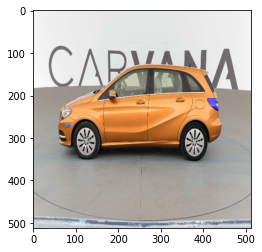

-------Predict Mask-------


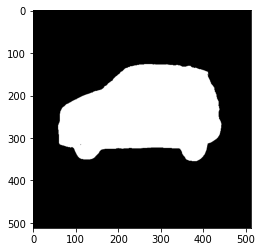

In [ ]:
print("-------Original Image-------")
plt.imshow(display_test_img, cmap="gray")
plt.show()
print("-------Predict Mask-------")
plt.imshow(mask[:, :, -1],cmap="gray")
plt.show()

In [ ]:
test_img_lst = os.listdir(ROOTDIR.test)
test_mask_lst = os.listdir(ROOTDIR.test_mask)

print(test_mask_lst[:5])
print(test_img_lst[:5])

print(len(test_mask_lst))
print(len(test_img_lst))

['cf89c3220bc4_09_mask.gif', 'cf89c3220bc4_08_mask.gif', 'cf89c3220bc4_10_mask.gif', 'cf89c3220bc4_04_mask.gif', 'cf89c3220bc4_11_mask.gif']
['cf89c3220bc4_06.jpg', 'cf89c3220bc4_01.jpg', 'cf89c3220bc4_02.jpg', 'cf89c3220bc4_08.jpg', 'cf89c3220bc4_09.jpg']
48
48


In [ ]:
sorted_test_mask_lst = sorted(test_mask_lst)
sorted_test_img_lst = sorted(test_img_lst)

print(sorted_test_mask_lst[:16])
print(sorted_test_img_lst[:16])

['cf89c3220bc4_01_mask.gif', 'cf89c3220bc4_02_mask.gif', 'cf89c3220bc4_03_mask.gif', 'cf89c3220bc4_04_mask.gif', 'cf89c3220bc4_05_mask.gif', 'cf89c3220bc4_06_mask.gif', 'cf89c3220bc4_07_mask.gif', 'cf89c3220bc4_08_mask.gif', 'cf89c3220bc4_09_mask.gif', 'cf89c3220bc4_10_mask.gif', 'cf89c3220bc4_11_mask.gif', 'cf89c3220bc4_12_mask.gif', 'cf89c3220bc4_13_mask.gif', 'cf89c3220bc4_14_mask.gif', 'cf89c3220bc4_15_mask.gif', 'cf89c3220bc4_16_mask.gif']
['cf89c3220bc4_01.jpg', 'cf89c3220bc4_02.jpg', 'cf89c3220bc4_03.jpg', 'cf89c3220bc4_04.jpg', 'cf89c3220bc4_05.jpg', 'cf89c3220bc4_06.jpg', 'cf89c3220bc4_07.jpg', 'cf89c3220bc4_08.jpg', 'cf89c3220bc4_09.jpg', 'cf89c3220bc4_10.jpg', 'cf89c3220bc4_11.jpg', 'cf89c3220bc4_12.jpg', 'cf89c3220bc4_13.jpg', 'cf89c3220bc4_14.jpg', 'cf89c3220bc4_15.jpg', 'cf89c3220bc4_16.jpg']


In [ ]:
permuted_test_img_lst = np.random.permutation(np.array(sorted_test_img_lst))
permuted_test_mask_lst = [x.replace(".jpg","_mask.gif") for x in permuted_test_img_lst]
print(permuted_test_img_lst[:5])
print(permuted_test_mask_lst[:5])

['d0dab700c896_13.jpg' 'd0dab700c896_15.jpg' 'd1a3af34e674_10.jpg'
 'd0dab700c896_08.jpg' 'd0dab700c896_03.jpg']
['d0dab700c896_13_mask.gif', 'd0dab700c896_15_mask.gif', 'd1a3af34e674_10_mask.gif', 'd0dab700c896_08_mask.gif', 'd0dab700c896_03_mask.gif']


In [ ]:
test_images_list = permuted_test_img_lst
test_masks_list = permuted_test_mask_lst

In [ ]:
test_dataset = CarvanaDataset(test_images_list, test_masks_list, 3, transform = val_transform)

In [ ]:
idx = 15
img,mask = test_dataset[idx]
print(img.shape)
print(mask.shape)

torch.Size([3, 512, 512])
torch.Size([1, 512, 512])


---------------Validation---------------
torch.Size([3, 512, 512])


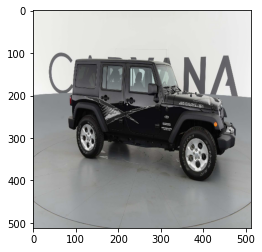

torch.Size([1, 512, 512])


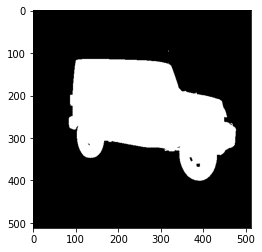

In [ ]:
print("---------------Validation---------------")
show_single_img(img,mask,index=15,train=True)

In [ ]:
test_dataloader = DataLoader(val_dataset,batch_size=CFG.batch_size,shuffle=False)

In [ ]:
img,mask = next(iter(test_dataloader))
print(img.shape,mask.shape)

torch.Size([4, 3, 512, 512]) torch.Size([4, 1, 512, 512])


In [ ]:
def test_model(model,dataloader,criterion,optimizer):
    model.eval()
    test_running_loss = 0
    iou_scores=0

    with torch.no_grad():
        for j,img_mask in enumerate(tqdm(dataloader)):
            img = img_mask[0].float().to(CFG.device)
            mask = img_mask[1].float().to(CFG.device)
            y_pred = model(img)
            loss = criterion(y_pred,mask)
            
            test_running_loss += loss.item() * CFG.batch_size

            mask[mask < 0]=0
            mask[mask > 0]=1

            tmask = mask.cpu().detach().numpy()
            ty_pred = y_pred.cpu().detach().numpy()
            intersection = np.logical_and(tmask, ty_pred)
            union = np.logical_or(tmask, ty_pred)
            iou_scores += np.sum(intersection) / np.sum(union)
            
        test_loss = test_running_loss / (j+1)
        iou = iou_scores / (j+1)
        print(test_loss)
        print(iou)
    return 0

In [ ]:
test_model(model=model,dataloader=test_dataloader,criterion=criterion,optimizer=optimizer)

  0%|          | 0/60 [00:00<?, ?it/s]

0.037777773166696234
0.20613978703816732


0

In [ ]:
# 흠...iou 어캐 구하는거지...?